In [1]:
#Have you ever wondered how a bike-sharing company can turn data into strategic decisions to attract more riders? In this case study, you’ll step into the shoes of a junior data analyst and conduct a comprehensive analysis for a fictional bike-sharing company. The goal? Uncover actionable insights that drive rapid success!

#Throughout this project, you’ll follow the six steps of the data analysis process: Ask, Prepare, Process, Analyze, Share, and Act. Each step includes practical, real-world tasks like exploring datasets, cleaning data, identifying patterns, and presenting findings—everything a data analyst does daily.

In [2]:
dir("/kaggle/input/")

[1] "cyclistic-data-2024"

In [3]:
filtered_data <- read.csv("/kaggle/input/cyclistic-data-2024/cyclistic_filtered_data.csv", stringsAsFactors = FALSE)

In [4]:
head(filtered_data)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration,day_of_week,hour_of_day,period_of_day
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<int>,<chr>
1,C9BD54F578F57246,electric_bike,2023-12-02 18:44:01,2023-12-02 18:47:51,,,,,41.92,-87.66,41.92,-87.66,member,3.833333,Saturday,18,Evening
2,CDBD92F067FA620E,electric_bike,2023-12-02 18:48:19,2023-12-02 18:54:48,,,,,41.92,-87.66,41.89,-87.64,member,6.483333,Saturday,18,Evening
3,ABC0858E52CBFC84,electric_bike,2023-12-24 01:56:32,2023-12-24 02:04:09,,,,,41.89,-87.62,41.90,-87.64,member,7.616667,Sunday,1,Night
4,F44B6F0E8F76DC90,electric_bike,2023-12-24 10:58:12,2023-12-24 11:03:04,,,,,41.95,-87.65,41.94,-87.65,member,4.866667,Sunday,10,Morning
5,3C876413281A90DF,electric_bike,2023-12-24 12:43:16,2023-12-24 12:44:57,,,,,41.92,-87.64,41.93,-87.64,member,1.683333,Sunday,12,Afternoon
6,28C0D6EFB81E1769,electric_bike,2023-12-24 13:59:57,2023-12-24 14:10:57,,,,,41.91,-87.63,41.88,-87.65,member,11.000000,Sunday,13,Afternoon


In [5]:
install.packages("dplyr")
install.packages("lubridate")
library(dplyr)
library(lubridate)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




Attaching package: ‘dplyr’




The following objects are masked from ‘package:stats’:

    filter, lag




The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union





Attaching package: ‘lubridate’




The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [6]:
#Filter Data

filtered_data <- filtered_data %>%
  filter(trip_duration >= 1 & trip_duration <= 1440) # 1440 min = 24 hrs

In [7]:
#Next Steps for Analysis

summary_stats <- filtered_data %>%
  group_by(member_casual) %>%
  summarise(
    avg_duration = mean(trip_duration, na.rm = TRUE),
    median_duration = median(trip_duration, na.rm = TRUE),
    min_duration = min(trip_duration, na.rm = TRUE),
    max_duration = max(trip_duration, na.rm = TRUE),
    total_trips = n()
  )
print(summary_stats)

# A tibble: 2 × 6
  member_casual avg_duration median_duration min_duration max_duration
  <chr>                <dbl>           <dbl>        <dbl>        <dbl>
1 casual                21.4           12.3             1        1440.
2 member                12.3            8.78            1        1440.
# ℹ 1 more variable: total_trips <int>


In [8]:
#Analyze Usage Patterns

usage_by_day <- filtered_data %>%
  group_by(member_casual, day_of_week) %>%
  summarise(trip_count = n()) %>%
  arrange(day_of_week)
print(usage_by_day)

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


# A tibble: 14 × 3
# Groups:   member_casual [2]
   member_casual day_of_week trip_count
   <chr>         <chr>            <int>
 1 casual        Friday          314503
 2 member        Friday          544859
 3 casual        Monday          250802
 4 member        Monday          546743
 5 casual        Saturday        438837
 6 member        Saturday        492215
 7 casual        Sunday          364129
 8 member        Sunday          426908
 9 casual        Thursday        263942
10 member        Thursday        588803
11 casual        Tuesday         230663
12 member        Tuesday         583727
13 casual        Wednesday       267586
14 member        Wednesday       626604


In [9]:
#Usage by Time of Day

usage_by_hour <- filtered_data %>%
  group_by(member_casual, hour_of_day) %>%
  summarise(trip_count = n())
print(usage_by_hour)

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


# A tibble: 48 × 3
# Groups:   member_casual [2]
   member_casual hour_of_day trip_count
   <chr>               <int>      <int>
 1 casual                  0      34911
 2 casual                  1      23402
 3 casual                  2      14508
 4 casual                  3       8069
 5 casual                  4       6347
 6 casual                  5      12214
 7 casual                  6      28930
 8 casual                  7      53837
 9 casual                  8      76072
10 casual                  9      76433
# ℹ 38 more rows


In [10]:
media_by_group <- usage_by_day %>%
  group_by(member_casual) %>%
  summarise(media_trip_count = mean(trip_count))
print(media_by_group)

# A tibble: 2 × 2
  member_casual media_trip_count
  <chr>                    <dbl>
1 casual                 304352.
2 member                 544266.


In [11]:
#Usage by Bike Type

bike_type_usage <- filtered_data %>%
  group_by(member_casual, rideable_type) %>%
  summarise(trip_count = n()) %>%
  mutate(proportion = trip_count / sum(trip_count))
print(bike_type_usage)

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


# A tibble: 6 × 4
# Groups:   member_casual [2]
  member_casual rideable_type    trip_count proportion
  <chr>         <chr>                 <int>      <dbl>
1 casual        classic_bike         985090     0.462 
2 casual        electric_bike       1063922     0.499 
3 casual        electric_scooter      81450     0.0382
4 member        classic_bike        1832333     0.481 
5 member        electric_bike       1921392     0.504 
6 member        electric_scooter      56134     0.0147


In [12]:
average_per_hour_group <- usage_by_hour %>%
  group_by(member_casual) %>%
  summarise(media_trip_count = mean(trip_count))
print(average_per_hour_group)

# A tibble: 2 × 2
  member_casual media_trip_count
  <chr>                    <dbl>
1 casual                  88769.
2 member                 158744.


In [13]:
#What to look for:
 # Days of the week: Members may ride more Average trips per weekday:Casual: 304,352 trips per day.Member: 544,266 trips per day.
#Comparison: Annual members make almost 1.8 times more trips
#Times of day: Peak hoursAverage trips per hour of the day:
#Casual: 88,769 trips per hour.
#Member: 158,744 trips per hour.
#Comparison: Again, members make about 1.8 times more trips per hour.
#Type of bike: See if there is a preference for e-bikes or classic bikes in each group.

In [14]:
#Visualize Data

install.packages("ggplot2")
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



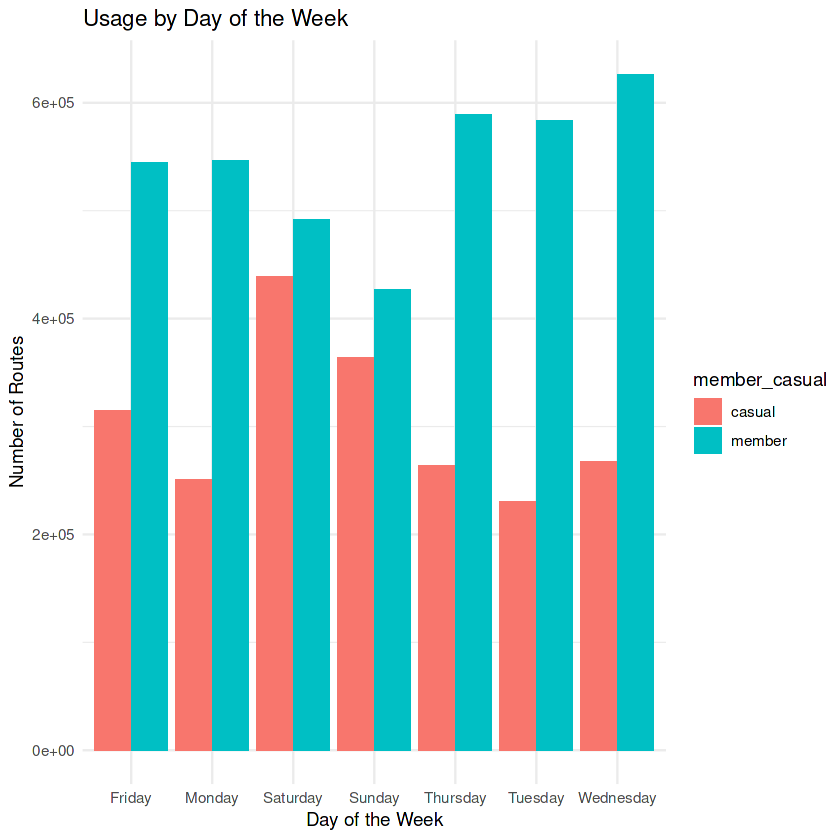

In [15]:
#Usage Chart by Day of the Week

ggplot(usage_by_day, aes(x = day_of_week, y = trip_count, fill = member_casual)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Usage by Day of the Week", x = "Day of the Week", y = "Number of Routes") +
  theme_minimal()

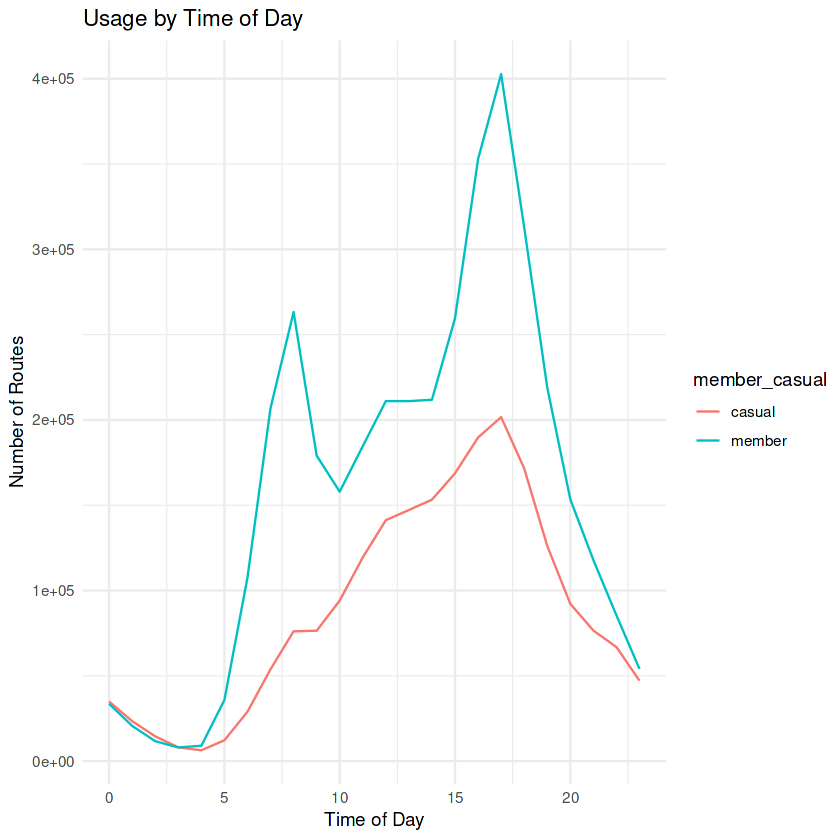

In [16]:
#Usage Chart by Time of Day

ggplot(usage_by_hour, aes(x = hour_of_day, y = trip_count, color = member_casual)) +
  geom_line() +
  labs(title = "Usage by Time of Day", x = "Time of Day", y = "Number of Routes") +
  theme_minimal()